<a href="https://colab.research.google.com/github/simonrod2404/TalentoTech/blob/main/Regresi%C3%B3n_log%C3%ADstica(clasificaci%C3%B3n).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

El dataset que escogi fue el siguiente: https://www.kaggle.com/datasets/vikasukani/diabetes-data-set

Es un data set con distintos datos medicos para predecir si alguien tiene diabetes o no.

In [183]:
#Importando librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [184]:
#Montando el dataset de mi Google Drive
from google.colab import drive
drive.mount('/content/drive/')
df = pd.read_csv('/content/drive/MyDrive/diabetes-dataset.csv')
df

#Nota: "DiabetesPedigreeFunction" Esta columna contiene el resultado de una funcion que calcula la probabilidad de que alguien tenga diabetes basandose en la historia familiar

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0
...,...,...,...,...,...,...,...,...,...
1995,2,75,64,24,55,29.7,0.370,33,0
1996,8,179,72,42,130,32.7,0.719,36,1
1997,6,85,78,0,0,31.2,0.382,42,0
1998,0,129,110,46,130,67.1,0.319,26,1


In [185]:
#Eliminando outliers usando el metodo IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

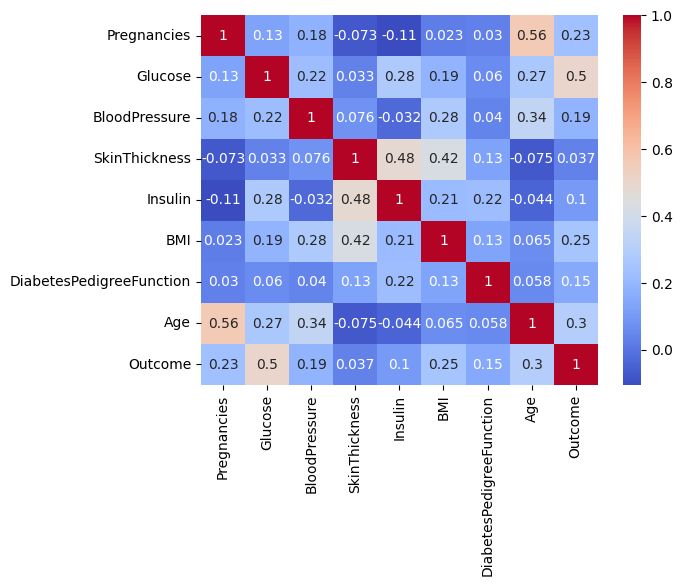

In [186]:
#Realizando matriz de correlación para ver qué variables utilizar.

corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

#No utilizo las variables con menos de 0.15 de correlación, ni Pregnancies que está correlacionada con Age
X = df.drop(["Outcome", "SkinThickness", "Insulin", "Pregnancies"], axis=1)
y = df['Outcome']


In [197]:
#Dividiendo datos y entrenando el modelo
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.max_iter = 1000
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

(2, 2)


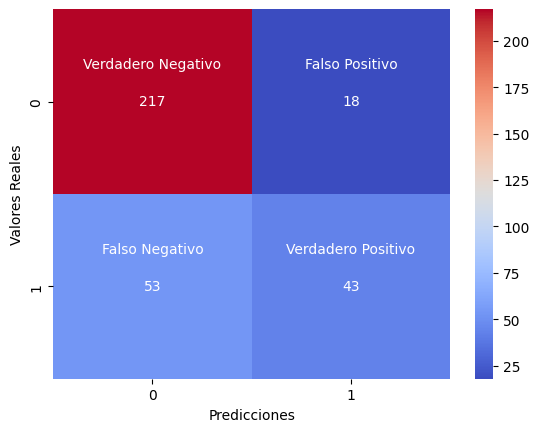

In [188]:
#Haciendo la matriz de confusión y graficandola con un heatmap
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Definir las etiquetas
etiquetas = ['Verdadero Negativo', 'Falso Positivo', 'Falso Negativo', 'Verdadero Positivo']

# Graficar el heatmap
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap='coolwarm')


# Agregar las etiquetas dentro de cada cuadrado
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        text = ax.text(j + 0.5, i + 0.3, etiquetas[i * cm.shape[0] + j],
                       ha="center", va="center", color="white")

plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.show()

In [198]:
#Calculando metricas de clasificacion
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.8368580060422961
Precision: 0.7682926829268293
Recall: 0.6428571428571429
F1-score: 0.7


In [190]:
#Ya que veo que las metricas varian mucho al volver a correr el codigo, voy a validar el resultado utilizando cross validation
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5)
print("Accuracy promedio:", scores.mean())


f1_scores = cross_val_score(model, X, y, cv=5, scoring='f1')
print("F1-score promedio:", f1_scores.mean())

recall_scores = cross_val_score(model, X, y, cv=5, scoring='recall')
print("Recall promedio:", recall_scores.mean())

precision_scores = cross_val_score(model, X, y, cv=5, scoring='precision')
print("Precision promedio:", precision_scores.mean())

Accuracy promedio: 0.7960047605969056
F1-score promedio: 0.6292267481298742
Recall promedio: 0.5543502613890963
Precision promedio: 0.7290689876444557


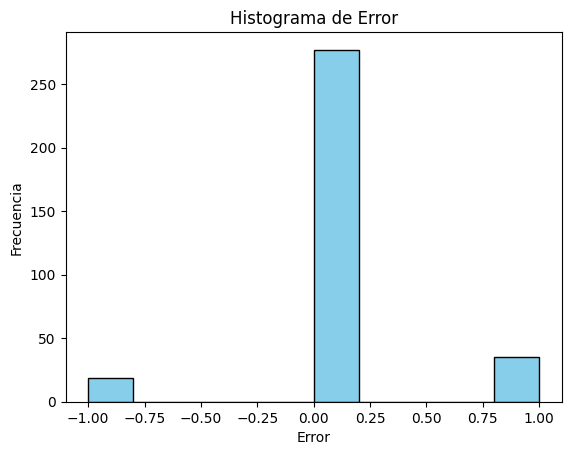

In [208]:
#Haciendo histograma de error
error = y_test - y_pred
plt.hist(error, color='skyblue', edgecolor='black')
plt.title('Histograma de Error')
plt.xlabel('Error')
plt.ylabel('Frecuencia')
plt.show()


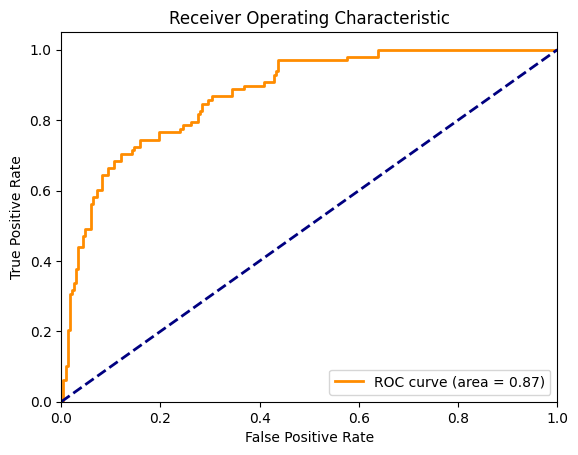

In [211]:
#Graficando area debajo de la curva (ROC)
from sklearn.metrics import roc_curve, roc_auc_score

# Calcular probabilidades de predicción
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calcular el área bajo la curva ROC
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()